In [1]:
# this file takes in all files and produce the appropriate s2d analysis
from pathlib import Path
from datasets import load_dataset
from evaluate import load
import pandas as pd
import numpy as np
from pathlib import Path
from functional import seq
from funcutils import underscore as _
from funcutils import get
from IPython.display import display, display_html, HTML
from editdistance import distance as edit_distance

import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn-v0_8-whitegrid')
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)

In [3]:
dspl_html = lambda x: display_html(x, raw=True)
rouge = load('rouge')

In [4]:
root_path = Path("/home/vente/repos/nlgs-research")


INPUT_TO_ANALYSE = ""

# TODO: get this file form argv so driver code can run all analyses in a loop
pkl = max( (root_path / "pipeline/predictions").glob("*s2d*"))
pkl.name

's2d-t5-small-5.pkl'

In [5]:
OUTPUT_PATH = Path("/home/vente/repos/nlgs-research/pipeline/scores") / pkl.name.removesuffix(".pkl")
OUTPUT_PATH.mkdir(exist_ok=True)
OUTPUT_PATH

PosixPath('/home/vente/repos/nlgs-research/pipeline/scores/s2d-t5-small-5')

In [6]:
corpus = pd.read_pickle(root_path / "pipeline/normalized_data/webnlg_clean.pkl")
test_predictions = pd.read_pickle(pkl)
test_corpus = corpus[corpus['subset']=='test']
test_corpus 

,subset,category,index,sd,nl
14495,test,Airport,0,"Abilene Regional Airport|city served|Abilene, ...","[Abilene, Texas is served by the Abilene regio..."
14496,test,Airport,1,Adolfo Suarez Madrid-Barajas Airport|location|...,[Adolfo Suarez Madrid-Barajas Airport can be f...
14497,test,Airport,2,Adolfo Suarez Madrid-Barajas Airport|runway na...,[The runway name of Adolfo Suarez Madrid-Baraj...
14498,test,Airport,3,Afonso Pena International Airport|i c a o loc...,[Afonso Pena International Airport ICAO Locati...
14499,test,Airport,4,Afonso Pena International Airport|city served|...,[Afonso Pena International Airport serves the ...
...,...,...,...,...,...
16090,test,University,1595,Acharya Institute of Technology|was given the ...,[The Acharya Institute of Technology in Karnat...
16091,test,University,1596,Romania|ethnic group|Germans of Romania; Roman...,[The Germans of Romania are one of the ethnic ...
16092,test,University,1597,School of Business and Social Sciences at the ...,[The School of Business and Social Sciences at...
16093,test,University,1598,School of Business and Social Sciences at the ...,[Denmark is led by the Monarchy of Demark and ...


In [7]:
compute_rouge = lambda x,y: rouge.compute(references=[x], predictions=[x], use_stemmer=False, use_aggregator=False, rouge_types=['rouge2'])

test_predictions['decoded']

0       Abilene Regional Airport|city served|Abilene, ...
1       Abilene Regional Airport|city served|Abilene, ...
2       Adolfo Suarez Madrid-Barajas Airport|location|...
3       Adolfo Suarez Madrid-Barajas Airport|location|...
4       Adolfo Suarez Madrid-Barajas Airport|location|...
                              ...                        
4219    School of Business and Social Sciences at the ...
4220    School of Business and Social Sciences at the ...
4221    School of Business and Social Sciences at the ...
4222    School of Business and Social Sciences at the ...
4223    School of Business and Social Sciences at the ...
Name: decoded, Length: 4224, dtype: object

In [8]:
test_predictions

,index,pred_ids,decoded,subset
0,0,"[0, 891, 23, 14205, 7676, 5735, 9175, 6726, 20...","Abilene Regional Airport|city served|Abilene, ...",test
1,1,"[0, 891, 23, 14205, 7676, 5735, 9175, 6726, 20...","Abilene Regional Airport|city served|Abilene, ...",test
2,2,"[0, 1980, 32, 40, 89, 32, 1923, 9, 2638, 12033...",Adolfo Suarez Madrid-Barajas Airport|location|...,test
3,3,"[0, 1980, 32, 40, 89, 32, 1923, 9, 2638, 12033...",Adolfo Suarez Madrid-Barajas Airport|location|...,test
4,4,"[0, 1980, 32, 40, 89, 32, 1923, 9, 2638, 12033...",Adolfo Suarez Madrid-Barajas Airport|location|...,test
...,...,...,...,...
4219,4219,"[0, 1121, 13, 1769, 11, 2730, 9226, 44, 8, 71,...",School of Business and Social Sciences at the ...,test
4220,4220,"[0, 1121, 13, 1769, 11, 2730, 9226, 44, 8, 71,...",School of Business and Social Sciences at the ...,test
4221,4221,"[0, 1121, 13, 1769, 11, 2730, 9226, 44, 8, 71,...",School of Business and Social Sciences at the ...,test
4222,4222,"[0, 1121, 13, 1769, 11, 2730, 9226, 44, 8, 71,...",School of Business and Social Sciences at the ...,test


In [9]:
# this file takes in all files and produce the appropriate s2d analysis
from pathlib import Path
from datasets import load_dataset
from evaluate import load
import pandas as pd
import numpy as np
from pathlib import Path
from functional import seq
from funcutils import underscore as _
from funcutils import get
from IPython.display import display, display_html, HTML
from editdistance import distance as edit_distance

import matplotlib.pyplot as plt

In [10]:
plt.style.use('seaborn-v0_8-whitegrid')
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)

In [11]:
dspl_html = lambda x: display_html(x, raw=True)
rouge = load('rouge')

In [12]:
root_path = Path("/home/vente/repos/nlgs-research")


INPUT_TO_ANALYSE = ""

# TODO: get this file form argv so driver code can run all analyses in a loop
pkl = max( (root_path / "pipeline/predictions").glob("*s2d*"))
pkl.name

's2d-t5-small-5.pkl'

In [13]:
OUTPUT_PATH = Path("/home/vente/repos/nlgs-research/pipeline/scores") / pkl.name.removesuffix(".pkl")
OUTPUT_PATH.mkdir(exist_ok=True)
OUTPUT_PATH

PosixPath('/home/vente/repos/nlgs-research/pipeline/scores/s2d-t5-small-5')

In [14]:
corpus = pd.read_pickle(root_path / "pipeline/normalized_data/webnlg_clean.pkl")
test_predictions = pd.read_pickle(pkl)
test_corpus = corpus[corpus['subset']=='test']
test_corpus 

,subset,category,index,sd,nl
14495,test,Airport,0,"Abilene Regional Airport|city served|Abilene, ...","[Abilene, Texas is served by the Abilene regio..."
14496,test,Airport,1,Adolfo Suarez Madrid-Barajas Airport|location|...,[Adolfo Suarez Madrid-Barajas Airport can be f...
14497,test,Airport,2,Adolfo Suarez Madrid-Barajas Airport|runway na...,[The runway name of Adolfo Suarez Madrid-Baraj...
14498,test,Airport,3,Afonso Pena International Airport|i c a o loc...,[Afonso Pena International Airport ICAO Locati...
14499,test,Airport,4,Afonso Pena International Airport|city served|...,[Afonso Pena International Airport serves the ...
...,...,...,...,...,...
16090,test,University,1595,Acharya Institute of Technology|was given the ...,[The Acharya Institute of Technology in Karnat...
16091,test,University,1596,Romania|ethnic group|Germans of Romania; Roman...,[The Germans of Romania are one of the ethnic ...
16092,test,University,1597,School of Business and Social Sciences at the ...,[The School of Business and Social Sciences at...
16093,test,University,1598,School of Business and Social Sciences at the ...,[Denmark is led by the Monarchy of Demark and ...


In [15]:
compute_rouge = lambda x,y: rouge.compute(references=[x], predictions=[x], use_stemmer=False, use_aggregator=False, rouge_types=['rouge2'])

test_predictions['decoded']

38668    Abilene Regional Airport|city served|Abilene, ...
38669    Abilene Regional Airport|city served|Abilene, ...
38670    Adolfo Suarez Madrid-Barajas Airport|location|...
38671    Adolfo Suarez Madrid-Barajas Airport|location|...
38672    Adolfo Suarez Madrid-Barajas Airport|location|...
                               ...                        
42887    School of Business and Social Sciences at the ...
42888    School of Business and Social Sciences at the ...
42889    School of Business and Social Sciences at the ...
42890    School of Business and Social Sciences at the ...
42891    School of Business and Social Sciences at the ...
Name: decoded, Length: 4224, dtype: object

In [16]:
test_predictions

,record_idx,seed_number,subset,category,split_index,sd,nl,input_ids,attention_mask,labels,pred_ids,decoded
38668,14495,0,test,Airport,0,"Abilene Regional Airport|city served|Abilene, ...","Abilene, Texas is served by the Abilene region...","[891, 23, 14205, 6, 2514, 19, 2098, 57, 8, 891...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[891, 23, 14205, 7676, 5735, 9175, 6726, 2098,...","[0, 891, 23, 14205, 7676, 5735, 9175, 6726, 20...","Abilene Regional Airport|city served|Abilene, ..."
38669,14495,1,test,Airport,0,"Abilene Regional Airport|city served|Abilene, ...",Abilene Regional Airport serves the city of Ab...,"[891, 23, 14205, 7676, 5735, 4657, 8, 690, 13,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[891, 23, 14205, 7676, 5735, 9175, 6726, 2098,...","[0, 891, 23, 14205, 7676, 5735, 9175, 6726, 20...","Abilene Regional Airport|city served|Abilene, ..."
38670,14496,0,test,Airport,1,Adolfo Suarez Madrid-Barajas Airport|location|...,Adolfo Suarez Madrid-Barajas Airport can be fo...,"[1980, 32, 40, 89, 32, 1923, 9, 2638, 12033, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1980, 32, 40, 89, 32, 1923, 9, 2638, 12033, 1...","[0, 1980, 32, 40, 89, 32, 1923, 9, 2638, 12033...",Adolfo Suarez Madrid-Barajas Airport|location|...
38671,14496,1,test,Airport,1,Adolfo Suarez Madrid-Barajas Airport|location|...,Adolfo Suarez Madrid-Barajas airport is locate...,"[1980, 32, 40, 89, 32, 1923, 9, 2638, 12033, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1980, 32, 40, 89, 32, 1923, 9, 2638, 12033, 1...","[0, 1980, 32, 40, 89, 32, 1923, 9, 2638, 12033...",Adolfo Suarez Madrid-Barajas Airport|location|...
38672,14496,2,test,Airport,1,Adolfo Suarez Madrid-Barajas Airport|location|...,Adolfo Suarez Madrid-Barajas Airport is locate...,"[1980, 32, 40, 89, 32, 1923, 9, 2638, 12033, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1980, 32, 40, 89, 32, 1923, 9, 2638, 12033, 1...","[0, 1980, 32, 40, 89, 32, 1923, 9, 2638, 12033...",Adolfo Suarez Madrid-Barajas Airport|location|...
...,...,...,...,...,...,...,...,...,...,...,...,...
42887,16092,1,test,University,1597,School of Business and Social Sciences at the ...,"Established in 1928, the School of Business an...","[25275, 16, 29004, 6, 8, 1121, 13, 1769, 11, 2...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1121, 13, 1769, 11, 2730, 9226, 44, 8, 71, 29...","[0, 1121, 13, 1769, 11, 2730, 9226, 44, 8, 71,...",School of Business and Social Sciences at the ...
42888,16093,0,test,University,1598,School of Business and Social Sciences at the ...,Denmark is led by the Monarchy of Demark and t...,"[18001, 19, 2237, 57, 8, 2963, 7064, 63, 13, 3...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1121, 13, 1769, 11, 2730, 9226, 44, 8, 71, 29...","[0, 1121, 13, 1769, 11, 2730, 9226, 44, 8, 71,...",School of Business and Social Sciences at the ...
42889,16093,1,test,University,1598,School of Business and Social Sciences at the ...,The School of Business and Social Sciences at ...,"[37, 1121, 13, 1769, 11, 2730, 9226, 44, 8, 71...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1121, 13, 1769, 11, 2730, 9226, 44, 8, 71, 29...","[0, 1121, 13, 1769, 11, 2730, 9226, 44, 8, 71,...",School of Business and Social Sciences at the ...
42890,16093,2,test,University,1598,School of Business and Social Sciences at the ...,The School of Business and Social Sciences at ...,"[37, 1121, 13, 1769, 11, 2730, 9226, 44, 8, 71...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1121, 13, 1769, 11, 2730, 9226, 44, 8, 71, 29...","[0, 1121, 13, 1769, 11, 2730, 9226, 44, 8, 71,...",School of Business and Social Sciences at the ...


In [17]:
corpus = pd.read_pickle(root_path / "pipeline/normalized_data/webnlg_clean.pkl")
test_predictions = pd.read_pickle(pkl)
test_corpus = corpus[corpus['subset']=='test'].copy()
test_corpus 

,subset,category,index,sd,nl
14495,test,Airport,0,"Abilene Regional Airport|city served|Abilene, ...","[Abilene, Texas is served by the Abilene regio..."
14496,test,Airport,1,Adolfo Suarez Madrid-Barajas Airport|location|...,[Adolfo Suarez Madrid-Barajas Airport can be f...
14497,test,Airport,2,Adolfo Suarez Madrid-Barajas Airport|runway na...,[The runway name of Adolfo Suarez Madrid-Baraj...
14498,test,Airport,3,Afonso Pena International Airport|i c a o loc...,[Afonso Pena International Airport ICAO Locati...
14499,test,Airport,4,Afonso Pena International Airport|city served|...,[Afonso Pena International Airport serves the ...
...,...,...,...,...,...
16090,test,University,1595,Acharya Institute of Technology|was given the ...,[The Acharya Institute of Technology in Karnat...
16091,test,University,1596,Romania|ethnic group|Germans of Romania; Roman...,[The Germans of Romania are one of the ethnic ...
16092,test,University,1597,School of Business and Social Sciences at the ...,[The School of Business and Social Sciences at...
16093,test,University,1598,School of Business and Social Sciences at the ...,[Denmark is led by the Monarchy of Demark and ...


In [18]:
compute_rouge = lambda x,y: rouge.compute(references=[x], predictions=[x], use_stemmer=False, use_aggregator=False, rouge_types=['rouge2'])

test_predictions['decoded']

38668    Abilene Regional Airport|city served|Abilene, ...
38669    Abilene Regional Airport|city served|Abilene, ...
38670    Adolfo Suarez Madrid-Barajas Airport|location|...
38671    Adolfo Suarez Madrid-Barajas Airport|location|...
38672    Adolfo Suarez Madrid-Barajas Airport|location|...
                               ...                        
42887    School of Business and Social Sciences at the ...
42888    School of Business and Social Sciences at the ...
42889    School of Business and Social Sciences at the ...
42890    School of Business and Social Sciences at the ...
42891    School of Business and Social Sciences at the ...
Name: decoded, Length: 4224, dtype: object

In [19]:
test_predictions

,record_idx,seed_number,subset,category,split_index,sd,nl,input_ids,attention_mask,labels,pred_ids,decoded
38668,14495,0,test,Airport,0,"Abilene Regional Airport|city served|Abilene, ...","Abilene, Texas is served by the Abilene region...","[891, 23, 14205, 6, 2514, 19, 2098, 57, 8, 891...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[891, 23, 14205, 7676, 5735, 9175, 6726, 2098,...","[0, 891, 23, 14205, 7676, 5735, 9175, 6726, 20...","Abilene Regional Airport|city served|Abilene, ..."
38669,14495,1,test,Airport,0,"Abilene Regional Airport|city served|Abilene, ...",Abilene Regional Airport serves the city of Ab...,"[891, 23, 14205, 7676, 5735, 4657, 8, 690, 13,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[891, 23, 14205, 7676, 5735, 9175, 6726, 2098,...","[0, 891, 23, 14205, 7676, 5735, 9175, 6726, 20...","Abilene Regional Airport|city served|Abilene, ..."
38670,14496,0,test,Airport,1,Adolfo Suarez Madrid-Barajas Airport|location|...,Adolfo Suarez Madrid-Barajas Airport can be fo...,"[1980, 32, 40, 89, 32, 1923, 9, 2638, 12033, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1980, 32, 40, 89, 32, 1923, 9, 2638, 12033, 1...","[0, 1980, 32, 40, 89, 32, 1923, 9, 2638, 12033...",Adolfo Suarez Madrid-Barajas Airport|location|...
38671,14496,1,test,Airport,1,Adolfo Suarez Madrid-Barajas Airport|location|...,Adolfo Suarez Madrid-Barajas airport is locate...,"[1980, 32, 40, 89, 32, 1923, 9, 2638, 12033, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1980, 32, 40, 89, 32, 1923, 9, 2638, 12033, 1...","[0, 1980, 32, 40, 89, 32, 1923, 9, 2638, 12033...",Adolfo Suarez Madrid-Barajas Airport|location|...
38672,14496,2,test,Airport,1,Adolfo Suarez Madrid-Barajas Airport|location|...,Adolfo Suarez Madrid-Barajas Airport is locate...,"[1980, 32, 40, 89, 32, 1923, 9, 2638, 12033, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1980, 32, 40, 89, 32, 1923, 9, 2638, 12033, 1...","[0, 1980, 32, 40, 89, 32, 1923, 9, 2638, 12033...",Adolfo Suarez Madrid-Barajas Airport|location|...
...,...,...,...,...,...,...,...,...,...,...,...,...
42887,16092,1,test,University,1597,School of Business and Social Sciences at the ...,"Established in 1928, the School of Business an...","[25275, 16, 29004, 6, 8, 1121, 13, 1769, 11, 2...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1121, 13, 1769, 11, 2730, 9226, 44, 8, 71, 29...","[0, 1121, 13, 1769, 11, 2730, 9226, 44, 8, 71,...",School of Business and Social Sciences at the ...
42888,16093,0,test,University,1598,School of Business and Social Sciences at the ...,Denmark is led by the Monarchy of Demark and t...,"[18001, 19, 2237, 57, 8, 2963, 7064, 63, 13, 3...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1121, 13, 1769, 11, 2730, 9226, 44, 8, 71, 29...","[0, 1121, 13, 1769, 11, 2730, 9226, 44, 8, 71,...",School of Business and Social Sciences at the ...
42889,16093,1,test,University,1598,School of Business and Social Sciences at the ...,The School of Business and Social Sciences at ...,"[37, 1121, 13, 1769, 11, 2730, 9226, 44, 8, 71...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1121, 13, 1769, 11, 2730, 9226, 44, 8, 71, 29...","[0, 1121, 13, 1769, 11, 2730, 9226, 44, 8, 71,...",School of Business and Social Sciences at the ...
42890,16093,2,test,University,1598,School of Business and Social Sciences at the ...,The School of Business and Social Sciences at ...,"[37, 1121, 13, 1769, 11, 2730, 9226, 44, 8, 71...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1121, 13, 1769, 11, 2730, 9226, 44, 8, 71, 29...","[0, 1121, 13, 1769, 11, 2730, 9226, 44, 8, 71,...",School of Business and Social Sciences at the ...


In [20]:
# don't penalize for quotes or spaces
norm_split_set = lambda x: x.str.upper().str.replace("'", '').str.replace(' ','').map(_.split(";")).map(set)
y_pred = norm_split_set(test_predictions['decoded'])
y_pred

38668    {ABILENEREGIONALAIRPORT|CITYSERVED|ABILENE,TEXAS}
38669    {ABILENEREGIONALAIRPORT|CITYSERVED|ABILENE,TEXAS}
38670    {ADOLFOSUAREZMADRID-BARAJASAIRPORT|LOCATION|MA...
38671    {ADOLFOSUAREZMADRID-BARAJASAIRPORT|LOCATION|MA...
38672    {ADOLFOSUAREZMADRID-BARAJASAIRPORT|LOCATION|MA...
                               ...                        
42887    {DENMARK|LEADERNAME|LARSLOKKERASMUSSEN, SCHOOL...
42888    {DENMARK|LEADERNAME|LARSLOKKERASMUSSEN, DENMAR...
42889    {DENMARK|LEADERNAME|LARSLOKKERASMUSSEN, SCHOOL...
42890    {DENMARK|LEADERNAME|LARSLOKKERASMUSSEN, EUROPE...
42891    {SCHOOLOFBUSINESSANDSOCIALSCIENCESATTHEAARHUSU...
Name: decoded, Length: 4224, dtype: object

In [21]:
y_true = norm_split_set(test_predictions['sd'])
y_true

38668    {ABILENEREGIONALAIRPORT|CITYSERVED|ABILENE,TEXAS}
38669    {ABILENEREGIONALAIRPORT|CITYSERVED|ABILENE,TEXAS}
38670    {ADOLFOSUAREZMADRID-BARAJASAIRPORT|LOCATION|MA...
38671    {ADOLFOSUAREZMADRID-BARAJASAIRPORT|LOCATION|MA...
38672    {ADOLFOSUAREZMADRID-BARAJASAIRPORT|LOCATION|MA...
                               ...                        
42887    {DENMARK|LEADERNAME|LARSLOKKERASMUSSEN, SCHOOL...
42888    {DENMARK|LEADERNAME|LARSLOKKERASMUSSEN, EUROPE...
42889    {DENMARK|LEADERNAME|LARSLOKKERASMUSSEN, EUROPE...
42890    {DENMARK|LEADERNAME|LARSLOKKERASMUSSEN, EUROPE...
42891    {SCHOOLOFBUSINESSANDSOCIALSCIENCESATTHEAARHUSU...
Name: sd, Length: 4224, dtype: object

In [22]:
f1_scores = seq(y_pred).zip(y_true).starmap(compute_f_measure).to_list()
f1_scores

NameError: name 'compute_f_measure' is not defined

In [23]:
def compute_closest_edit_dists(y_pred, y_true):
    # we need an alignment of the labels by edit distance
    return (
      seq(y_pred)
        .cartesian(y_true)
        .starmap(edit_distance) 
        .sorted()
        # full penalty for missed guesses or too many guesses
        .take(seq(y_true, y_pred).map(len).max())
        .to_list()
    )

edit_distances = (
  seq(y_pred)
    .zip(y_true)
    .starmap(compute_closest_edit_dists)
    .map(np.mean)
    .to_list()
)
edit_distances 

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 20.0,
 0.0,
 6.0,
 0.0,
 0.0,
 7.0,
 0.0,
 6.5,
 0.0,
 2.0,
 7.0,
 0.0,
 0.0,
 0.0,
 2.0,
 3.0,
 3.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 2.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 7.0,
 10.0,
 10.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 7.0,
 7.0,
 0.0,
 25.5,
 21.0,
 0.0,
 0.0,
 20.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 7.0,
 16.0,
 8.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 27.666666666666668,
 21.5,
 17.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 6.0,
 0.0,
 0.0,
 0.0,
 0.0,
 33.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.

In [24]:
# define set notion of precision when multiple labels are assigned
# to a single instance, with epsilon preventing div by zero
def compute_f_measure(pred: set[str], gt: set[str], epsilon=1e-99):
    tp = len(pred.intersection(gt)) # pred true and actually true
    fp = len(gt - pred)             # in pred but not in gt
    fn = len(pred - gt)             # not in pred but actualy true

    prec = tp / (tp + fp + epsilon) 
    recl = tp / (tp + fn + epsilon) 
    f1 = (2 * prec * recl) / (prec + recl + epsilon)
    return f1

 ## Unit Tests

In [25]:
assert compute_f_measure(set("a"), set('a')) == 1
assert compute_f_measure(set("ab"), set('a')) == 2/3
assert compute_f_measure(set() , set('a')) == 0

In [26]:
# don't penalize for quotes or spaces
norm_split_set = lambda x: x.str.upper().str.replace("'", '').str.replace(' ','').map(_.split(";")).map(set)
y_pred = norm_split_set(test_predictions['decoded'])
y_pred

38668    {ABILENEREGIONALAIRPORT|CITYSERVED|ABILENE,TEXAS}
38669    {ABILENEREGIONALAIRPORT|CITYSERVED|ABILENE,TEXAS}
38670    {ADOLFOSUAREZMADRID-BARAJASAIRPORT|LOCATION|MA...
38671    {ADOLFOSUAREZMADRID-BARAJASAIRPORT|LOCATION|MA...
38672    {ADOLFOSUAREZMADRID-BARAJASAIRPORT|LOCATION|MA...
                               ...                        
42887    {DENMARK|LEADERNAME|LARSLOKKERASMUSSEN, SCHOOL...
42888    {DENMARK|LEADERNAME|LARSLOKKERASMUSSEN, DENMAR...
42889    {DENMARK|LEADERNAME|LARSLOKKERASMUSSEN, SCHOOL...
42890    {DENMARK|LEADERNAME|LARSLOKKERASMUSSEN, EUROPE...
42891    {SCHOOLOFBUSINESSANDSOCIALSCIENCESATTHEAARHUSU...
Name: decoded, Length: 4224, dtype: object

In [27]:
y_true = norm_split_set(test_predictions['sd'])
y_true

38668    {ABILENEREGIONALAIRPORT|CITYSERVED|ABILENE,TEXAS}
38669    {ABILENEREGIONALAIRPORT|CITYSERVED|ABILENE,TEXAS}
38670    {ADOLFOSUAREZMADRID-BARAJASAIRPORT|LOCATION|MA...
38671    {ADOLFOSUAREZMADRID-BARAJASAIRPORT|LOCATION|MA...
38672    {ADOLFOSUAREZMADRID-BARAJASAIRPORT|LOCATION|MA...
                               ...                        
42887    {DENMARK|LEADERNAME|LARSLOKKERASMUSSEN, SCHOOL...
42888    {DENMARK|LEADERNAME|LARSLOKKERASMUSSEN, EUROPE...
42889    {DENMARK|LEADERNAME|LARSLOKKERASMUSSEN, EUROPE...
42890    {DENMARK|LEADERNAME|LARSLOKKERASMUSSEN, EUROPE...
42891    {SCHOOLOFBUSINESSANDSOCIALSCIENCESATTHEAARHUSU...
Name: sd, Length: 4224, dtype: object

In [28]:
f1_scores = seq(y_pred).zip(y_true).starmap(compute_f_measure).to_list()
f1_scores

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

In [29]:
def compute_closest_edit_dists(y_pred, y_true):
    # we need an alignment of the labels by edit distance
    return (
      seq(y_pred)
        .cartesian(y_true)
        .starmap(edit_distance) 
        .sorted()
        # full penalty for missed guesses or too many guesses
        .take(seq(y_true, y_pred).map(len).max())
        .to_list()
    )

edit_distances = (
  seq(y_pred)
    .zip(y_true)
    .starmap(compute_closest_edit_dists)
    .map(np.mean)
    .to_list()
)
edit_distances 

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 20.0,
 0.0,
 6.0,
 0.0,
 0.0,
 7.0,
 0.0,
 6.5,
 0.0,
 2.0,
 7.0,
 0.0,
 0.0,
 0.0,
 2.0,
 3.0,
 3.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 2.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 7.0,
 10.0,
 10.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 7.0,
 7.0,
 0.0,
 25.5,
 21.0,
 0.0,
 0.0,
 20.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 7.0,
 16.0,
 8.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 27.666666666666668,
 21.5,
 17.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 6.0,
 0.0,
 0.0,
 0.0,
 0.0,
 33.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.

In [30]:
results = pd.merge(corpus, test_predictions)
results['f1_scores'] = f1_scores
results['med_scores'] = edit_distances # med mean edit distance

TypeError: unhashable type: 'list'

In [31]:
results = pd.merge(corpus, test_predictions)
results['f1_scores'] = f1_scores
results['med_scores'] = edit_distances # med mean edit distance

TypeError: unhashable type: 'list'

In [32]:
results = pd.merge(corpus, test_predictions)
results 

TypeError: unhashable type: 'list'

In [33]:
results = test_predictions

In [34]:
results['f1_scores'] = f1_scores
results['med_scores'] = edit_distances # med mean edit distance

In [35]:
results = test_predictions
results['f1_scores'] = f1_scores
results['med_scores'] = edit_distances # med mean edit distance
results 

,record_idx,seed_number,subset,category,split_index,sd,nl,input_ids,attention_mask,labels,pred_ids,decoded,f1_scores,med_scores
38668,14495,0,test,Airport,0,"Abilene Regional Airport|city served|Abilene, ...","Abilene, Texas is served by the Abilene region...","[891, 23, 14205, 6, 2514, 19, 2098, 57, 8, 891...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[891, 23, 14205, 7676, 5735, 9175, 6726, 2098,...","[0, 891, 23, 14205, 7676, 5735, 9175, 6726, 20...","Abilene Regional Airport|city served|Abilene, ...",1.000000,0.000000
38669,14495,1,test,Airport,0,"Abilene Regional Airport|city served|Abilene, ...",Abilene Regional Airport serves the city of Ab...,"[891, 23, 14205, 7676, 5735, 4657, 8, 690, 13,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[891, 23, 14205, 7676, 5735, 9175, 6726, 2098,...","[0, 891, 23, 14205, 7676, 5735, 9175, 6726, 20...","Abilene Regional Airport|city served|Abilene, ...",1.000000,0.000000
38670,14496,0,test,Airport,1,Adolfo Suarez Madrid-Barajas Airport|location|...,Adolfo Suarez Madrid-Barajas Airport can be fo...,"[1980, 32, 40, 89, 32, 1923, 9, 2638, 12033, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1980, 32, 40, 89, 32, 1923, 9, 2638, 12033, 1...","[0, 1980, 32, 40, 89, 32, 1923, 9, 2638, 12033...",Adolfo Suarez Madrid-Barajas Airport|location|...,1.000000,0.000000
38671,14496,1,test,Airport,1,Adolfo Suarez Madrid-Barajas Airport|location|...,Adolfo Suarez Madrid-Barajas airport is locate...,"[1980, 32, 40, 89, 32, 1923, 9, 2638, 12033, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1980, 32, 40, 89, 32, 1923, 9, 2638, 12033, 1...","[0, 1980, 32, 40, 89, 32, 1923, 9, 2638, 12033...",Adolfo Suarez Madrid-Barajas Airport|location|...,1.000000,0.000000
38672,14496,2,test,Airport,1,Adolfo Suarez Madrid-Barajas Airport|location|...,Adolfo Suarez Madrid-Barajas Airport is locate...,"[1980, 32, 40, 89, 32, 1923, 9, 2638, 12033, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1980, 32, 40, 89, 32, 1923, 9, 2638, 12033, 1...","[0, 1980, 32, 40, 89, 32, 1923, 9, 2638, 12033...",Adolfo Suarez Madrid-Barajas Airport|location|...,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42887,16092,1,test,University,1597,School of Business and Social Sciences at the ...,"Established in 1928, the School of Business an...","[25275, 16, 29004, 6, 8, 1121, 13, 1769, 11, 2...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1121, 13, 1769, 11, 2730, 9226, 44, 8, 71, 29...","[0, 1121, 13, 1769, 11, 2730, 9226, 44, 8, 71,...",School of Business and Social Sciences at the ...,0.769231,1.571429
42888,16093,0,test,University,1598,School of Business and Social Sciences at the ...,Denmark is led by the Monarchy of Demark and t...,"[18001, 19, 2237, 57, 8, 2963, 7064, 63, 13, 3...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1121, 13, 1769, 11, 2730, 9226, 44, 8, 71, 29...","[0, 1121, 13, 1769, 11, 2730, 9226, 44, 8, 71,...",School of Business and Social Sciences at the ...,0.666667,3.857143
42889,16093,1,test,University,1598,School of Business and Social Sciences at the ...,The School of Business and Social Sciences at ...,"[37, 1121, 13, 1769, 11, 2730, 9226, 44, 8, 71...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1121, 13, 1769, 11, 2730, 9226, 44, 8, 71, 29...","[0, 1121, 13, 1769, 11, 2730, 9226, 44, 8, 71,...",School of Business and Social Sciences at the ...,0.727273,6.000000
42890,16093,2,test,University,1598,School of Business and Social Sciences at the ...,The School of Business and Social Sciences at ...,"[37, 1121, 13, 1769, 11, 2730, 9226, 44, 8, 71...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1121, 13, 1769, 11, 2730, 9226, 44, 8, 71, 29...","[0, 1121, 13, 1769, 11, 2730, 9226, 44, 8, 71,...",School of Business and Social Sciences at the ...,0.666667,4.428571


In [36]:
# let's define nth finish and "place-number" as 0 for "finishing in first place"
# give find the place-number given a score: ties should have the same place
score_to_nth_finish: dict[float, int]= (
  seq(f1_scores)
    .sorted(reverse=True) # Highest to lowest
    .zip_with_index()     # gives an over-estimate of nth-finish
    .group_by(get[0])     # so we group by the f1 scores
    .map(get[1])          # then we get the actual place of the score
    .map(get[0])          # it's sorted, so take the first to account for ties
    .to_dict()            # convert to dictionary
)
seq(score_to_nth_finish.items()).to_pandas()

,0,1
0,1.000000,0
1,0.923077,1592
2,0.909091,1603
3,0.888889,1611
4,0.857143,1757
5,0.833333,1914
6,0.833333,1917
7,0.800000,1924
8,0.800000,1997
9,0.769231,2120


  so we can sort by this key later, and also get a broad impression
 of the distribution of errors. Later we'll plot a histogram anyway.

 ## Error analysis

In [37]:
results['nth_finish'] = results['f1_scores'].map(score_to_nth_finish)
results['nth_finish'] 

38668       0
38669       0
38670       0
38671       0
38672       0
         ... 
42887    2120
42888    2337
42889    2312
42890    2337
42891    1917
Name: nth_finish, Length: 4224, dtype: int64

In [38]:
results[['nth_finish','med_scores', 'f1_scores', 'decoded','sd']].round(3).to_csv('vis.csv')

In [39]:
# 
worst_finishes = results[results.f1_scores == 0]
dspl_html(worst_finishes[['med_scores','f1_scores', 'decoded','sd']].to_html())
print(len(worst_finishes))

,med_scores,f1_scores,decoded,sd
38676,2.000000,0.0,Afonso Pena International Airport ICAO Location Idenitifier|SBCT,Afonso Pena International Airport|i c a o location identifier|SBCT
38680,1.000000,0.0,Al Taqaddum Air Base|city served|Fallujah,Al-Taqaddum Air Base|city served|Fallujah
38690,20.000000,0.0,Amsterdam Schiphol Airport|first runway name|18,Amsterdam Airport Schiphol|1st runway number|18
38692,6.000000,0.0,Amsterdam Airport Schiphol|1st runway runway number|18,Amsterdam Airport Schiphol|1st runway number|18
38695,7.000000,0.0,Amsterdam Airport Schiphol|5th runway type|Asphalt,Amsterdam Airport Schiphol|5th runway surface type|Asphalt
38697,6.500000,0.0,Amsterdam Airport Schiphol|runway name|Kaagbaan; Amsterdam Airport Schiphol|runway name|06/24,Amsterdam Airport Schiphol|runway name|06/24 Kaagbaan
38699,2.000000,0.0,Andrews County Airport|elevation above the sea level (in metres)|973,Andrews County Airport|elevation above the sea level (in metres)|973.0
38700,7.000000,0.0,Andrews Airport|elevation above the sea level (in metres)|933.0,Andrews County Airport|elevation above the sea level (in metres)|973.0
38704,2.000000,0.0,Andrews County Airport|runway length|896,Andrews County Airport|runway length|896.0
38705,3.000000,0.0,Angola International Airport|first runway surface type|Asphalt,Angola International Airport|1st runway surface type|Asphalt


479


In [40]:
len(results)

4224

<Axes: >

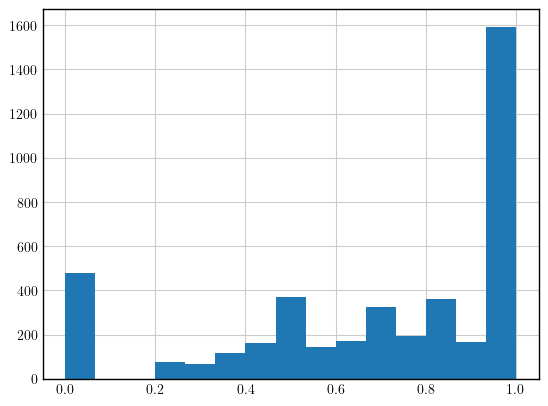

In [41]:
results['f1_scores'].hist(bins=15)

In [42]:
results.f1_scores.describe()

count    4224.000000
mean        0.691921
std         0.332004
min         0.000000
25%         0.500000
50%         0.800000
75%         1.000000
max         1.000000
Name: f1_scores, dtype: float64

In [43]:
results[['med_scores','f1_scores']].des

AttributeError: 'DataFrame' object has no attribute 'des'

In [44]:
results[['med_scores','f1_scores']].describe()

,med_scores,f1_scores
count,4224.000000,4224.000000
mean,3.996743,0.691921
std,14.133166,0.332004
min,0.000000,0.000000
25%,0.000000,0.500000
50%,2.200000,0.800000
75%,5.500000,1.000000
max,671.250000,1.000000


<Axes: >

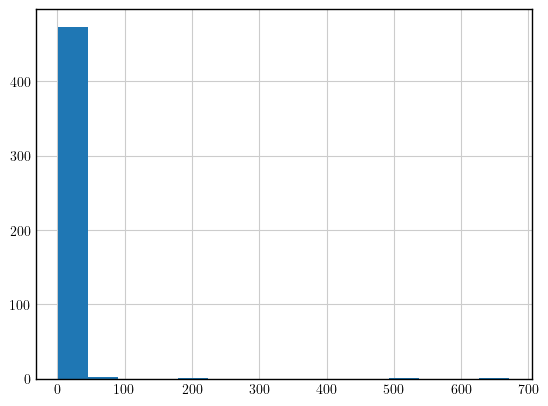

In [45]:
worst_finishes['med_scores'].hist(bins=15)

<Axes: >

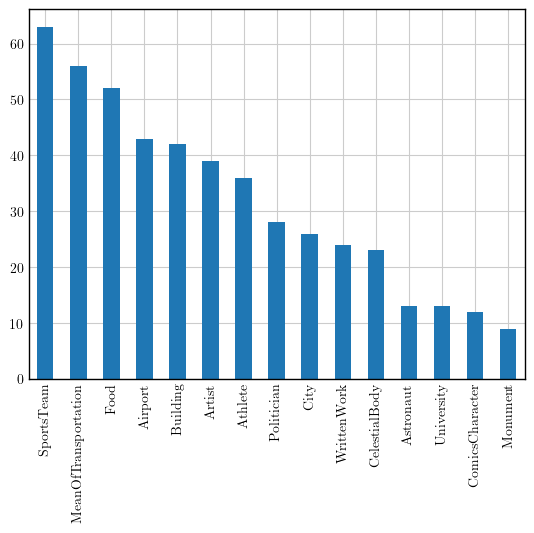

In [46]:
worst_finishes.category.value_counts().plot.bar()

<Axes: >

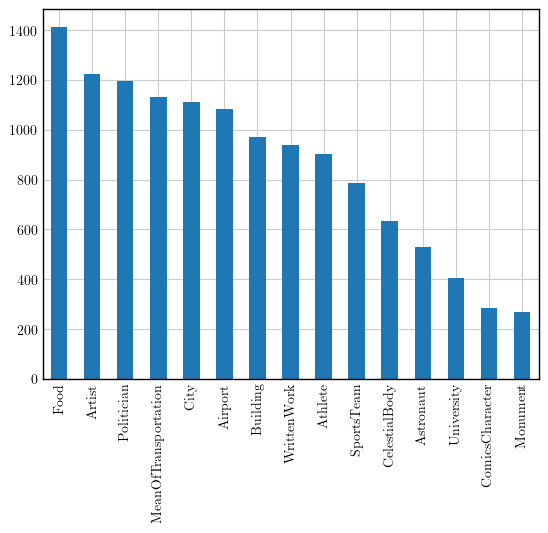

In [47]:
train_corpus = corpus[corpus.subset == 'train']
train_corpus.category.value_counts().plot.bar()

<Axes: >

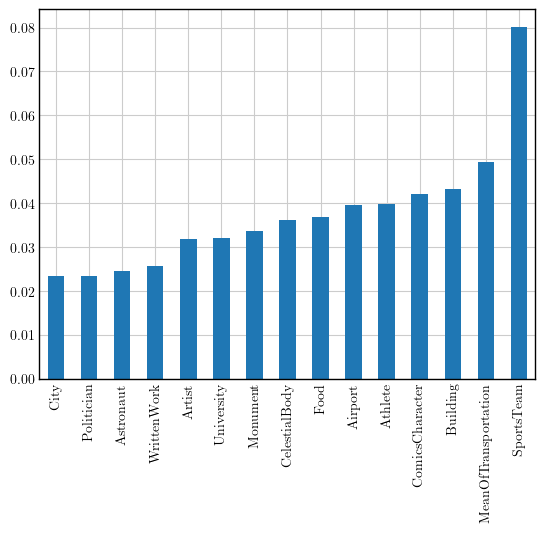

In [48]:
# normalized performance by category
npc = worst_finishes.category.value_counts() / train_corpus.category.value_counts()
npc.sort_values().plot.bar()

In [49]:
worst_finishes

,record_idx,seed_number,subset,category,split_index,sd,nl,input_ids,attention_mask,labels,pred_ids,decoded,f1_scores,med_scores,nth_finish
38676,14498,0,test,Airport,3,Afonso Pena International Airport|i c a o loc...,Afonso Pena International Airport ICAO Locatio...,"[71, 89, 106, 7, 32, 4511, 9, 1331, 5735, 3, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[71, 89, 106, 7, 32, 4511, 9, 1331, 5735, 9175...","[0, 71, 89, 106, 7, 32, 4511, 9, 1331, 5735, 3...",Afonso Pena International Airport ICAO Locatio...,0.0,2.000000,3745
38680,14500,0,test,Airport,5,Al-Taqaddum Air Base|city served|Fallujah,The Al Taqaddum Air Base serves the city of Fa...,"[37, 901, 2067, 1824, 13039, 440, 1761, 8430, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[901, 18, 382, 9, 1824, 13039, 440, 1761, 8430...","[0, 901, 2067, 1824, 13039, 440, 1761, 8430, 9...",Al Taqaddum Air Base|city served|Fallujah,0.0,1.000000,3745
38690,14504,0,test,Airport,9,Amsterdam Airport Schiphol|1st runway number|18,The first runway at Amsterdam's Schiphol Airpo...,"[37, 166, 22750, 44, 14305, 31, 7, 10289, 102,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[14305, 5735, 10289, 102, 2831, 9175, 536, 7, ...","[0, 14305, 10289, 102, 2831, 5735, 9175, 14672...",Amsterdam Schiphol Airport|first runway name|18,0.0,20.000000,3745
38692,14504,2,test,Airport,9,Amsterdam Airport Schiphol|1st runway number|18,The number of the 1st runway at Amsterdam Airp...,"[37, 381, 13, 8, 209, 7, 17, 22750, 44, 14305,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[14305, 5735, 10289, 102, 2831, 9175, 536, 7, ...","[0, 14305, 5735, 10289, 102, 2831, 9175, 536, ...",Amsterdam Airport Schiphol|1st runway runway n...,0.0,6.000000,3745
38695,14505,2,test,Airport,10,Amsterdam Airport Schiphol|5th runway surface...,The 5th runway of the Amsterdam Airport Schiph...,"[37, 305, 189, 22750, 13, 8, 14305, 5735, 1028...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[14305, 5735, 10289, 102, 2831, 9175, 755, 189...","[0, 14305, 5735, 10289, 102, 2831, 9175, 755, ...",Amsterdam Airport Schiphol|5th runway type|Asp...,0.0,7.000000,3745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42723,16025,0,test,SportsTeam,1530,A.F.C. Blackpool|manager|Stuart Parker (footba...,"A.F.C. Blackpool is in Blackpool, which counci...","[71, 5, 371, 5, 254, 5, 1589, 13194, 19, 16, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[71, 5, 371, 5, 254, 5, 1589, 13194, 9175, 241...","[0, 71, 5, 371, 5, 254, 5, 1589, 13194, 9175, ...",A.F.C. Blackpool|manager|Stuart Parker; Stuart...,0.0,11.600000,3745
42727,16027,1,test,SportsTeam,1532,AEK Athens F.C.|manager|Gus Poyet; Gus Poyet|c...,Gus Poyet is the manager of AEK Athens who pla...,"[2846, 7, 1908, 63, 15, 17, 19, 8, 2743, 13, 3...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 14611, 439, 486, 3225, 7, 377, 5, 254, 5, ...","[0, 3, 14611, 439, 486, 3225, 7, 9175, 24185, ...",AEK Athens|manager|Gus Poyet; Gus Poyet|club|E...,0.0,6.800000,3745
42767,16044,0,test,WrittenWork,1549,Into Battle (novel)|country|Australians; Into ...,The novel Into Battle is published in Australi...,"[37, 3714, 3, 27201, 10141, 19, 1790, 16, 2051...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 27201, 10141, 41, 5326, 15, 40, 61, 9175, ...","[0, 3, 27201, 10141, 41, 5326, 15, 40, 61, 917...",Into Battle (novel)|country|Australia; Into Ba...,0.0,11.600000,3745
42847,16077,2,test,Astronaut,1582,"Buzz Aldrin|birth place|Glen Ridge, New Jersey...","Edwin E. ""Buzz"" Aldrin Jr was a Fighter pilot ...","[4857, 3757, 262, 5, 96, 7793, 5271, 121, 901,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[23211, 901, 19161, 9175, 20663, 286, 9175, 51...","[0, 4857, 3757, 262, 5, 96, 7793, 5271, 121, 9...","Edwin E. ""Buzz"" Aldrin|birth place|Glen Ridge,...",0.0,18.857143,3745


In [50]:
worst_finishes.sort(by=['med_score'])

AttributeError: 'DataFrame' object has no attribute 'sort'

In [51]:
worst_finishes.sort_values(by=['med_sc

SyntaxError: EOL while scanning string literal (<ipython-input-51-bf9d37c60b18>, line 2)

In [52]:
worst_finishes.sort_values(by=['med_score'])

KeyError: 'med_score'

In [53]:
worst_finishes.sort_values(by=['med_scores'])

,record_idx,seed_number,subset,category,split_index,sd,nl,input_ids,attention_mask,labels,pred_ids,decoded,f1_scores,med_scores,nth_finish
38763,14533,1,test,Artist,38,Aaron Deer|record label|Kill Rock Stars,Aaron Deer is signed to the record label Kill ...,"[14411, 374, 49, 19, 3814, 12, 8, 1368, 3783, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[14411, 374, 49, 9175, 60, 7621, 3783, 9175, 4...","[0, 14411, 374, 49, 9175, 60, 7621, 3783, 9175...",Aaron Deer|record label|Kild Rock Stars,0.0,1.00,3745
38762,14533,0,test,Artist,38,Aaron Deer|record label|Kill Rock Stars,Aaron Deer has been signed to the record label...,"[14411, 374, 49, 65, 118, 3814, 12, 8, 1368, 3...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[14411, 374, 49, 9175, 60, 7621, 3783, 9175, 4...","[0, 14411, 374, 49, 9175, 60, 7621, 3783, 9175...",Aaron Deer|record label|Kild Rock Stars,0.0,1.00,3745
38764,14533,2,test,Artist,38,Aaron Deer|record label|Kill Rock Stars,Aaron Deer's record label is called Kill Rock ...,"[14411, 374, 49, 31, 7, 1368, 3783, 19, 718, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[14411, 374, 49, 9175, 60, 7621, 3783, 9175, 4...","[0, 14411, 374, 49, 9175, 60, 7621, 3783, 9175...",Aaron Deer|record label|Kild Rock Stars,0.0,1.00,3745
39583,14877,0,test,WrittenWork,382,John Cowper Powys|notable work|A Glastonbury R...,A Glastonbury Romance is John Cowper Powys not...,"[71, 10941, 4411, 7165, 3385, 565, 19, 1079, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1079, 15477, 883, 1908, 210, 63, 7, 9175, 226...","[0, 1079, 15477, 883, 1908, 210, 63, 9175, 226...",John Cowper Powy|notable work|A Glastonbury Ro...,0.0,1.00,3745
39387,14793,0,test,Politician,298,"Agnes Ward White|birth place|Marietta, Ohio","Marietta, Ohio was the birthplace of Agnes War...","[10149, 10669, 6, 6167, 47, 8, 3879, 4687, 13,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[4821, 1496, 15811, 1945, 9175, 20663, 286, 91...","[0, 4821, 1496, 15811, 1945, 9175, 20663, 286,...","Agnes Ward White|birth place|Marinetta, Ohio",0.0,1.00,3745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39523,14854,2,test,University,359,School of Business and Social Sciences at the ...,Thomas Pallesen is the Dean at the School of B...,"[3576, 4826, 965, 35, 19, 8, 12738, 44, 8, 112...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1121, 13, 1769, 11, 2730, 9226, 44, 8, 71, 29...","[0, 3576, 4826, 965, 35, 9175, 138, 51, 9, 692...",Thomas Pallesen|alma mater|School of Business ...,0.0,48.00,3745
39007,14632,0,test,Building,137,Dublin|leader name|Criona Ni Dhalaigh,Criona Ni Dhalaigh was Lord Mayor of Dublin.,"[9605, 106, 9, 2504, 309, 3828, 9, 9031, 47, 2...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[14112, 9175, 22900, 564, 9175, 254, 16310, 9,...","[0, 9605, 106, 9, 2504, 309, 3828, 9, 9031, 91...","Criona Ni Dhalaigh|office (worked at, worked a...",0.0,48.00,3745
42463,15930,2,test,City,1435,"Anderson, Indiana|is part of|Fall Creek Townsh...","Located in the United States, in Madison Count...","[3, 8691, 16, 8, 907, 1323, 6, 16, 16168, 1334...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[11825, 6, 11494, 9175, 159, 294, 13, 9175, 37...","[0, 11825, 20381, 6, 11825, 20381, 6, 11825, 2...","Anderson Township, Anderson Township, Anderson...",0.0,187.60,3745
40339,15145,2,test,SportsTeam,650,AFC Ajax (amateurs)|ground|Sportpark De Toekom...,Jong Ajax are the tenants of the De Toekomst S...,"[8178, 122, 71, 1191, 226, 33, 8, 16801, 13, 8...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[71, 5390, 71, 1191, 226, 41, 265, 12552, 61, ...","[0, 71, 5, 371, 5, 254, 5, 71, 5, 371, 5, 254,...",A.F.C. A.F.C. A.F.C. A.F.C. A.F.C. A.F.C. A.F....,0.0,508.00,3745
